# AllLife Credit Card Customer Segmentation

## Background: 
AllLife Bank wants to focus on its credit card customer base in the next
financial year. They have been advised by their marketing research team, that the
penetration in the market can be improved. Based on this input, the Marketing team
proposes to run personalised campaigns to target new customers as well as upsell to
existing customers. Another insight from the market research was that the customers
perceive the support services of the back poorly. Based on this, the Operations team
wants to upgrade the service delivery model, to ensure that customers queries are
resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the
Data Science team for help.

Objective: To identify different segments in the existing customer based on their
spending patterns as well as past interaction with the bank.

## Key Questions:
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and
service these customers?

## Data Description:
Data is of various customers of a bank with their credit limit, the total number of credit
cards the customer has, and different channels through which customer has
contacted the bank for any queries, different channels include visiting the bank,
online and through a call centre. 
Proprietary content. ©Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.
Steps to follow:
1. Perform univariate analysis on the data to better understand the variables at your
disposal and to get an idea about the no of clusters. Perform EDA, create
visualizations to explore data. (10 marks)
2. Properly comment on the codes, provide explanations of the steps taken in the
notebook and conclude your insights from the graphs. (5 marks)
3. Execute K-means clustering use elbow plot and analyse clusters using boxplot (10
marks)
4. Execute hierarchical clustering (with different linkages) with the help of dendrogram
and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)
5. Calculate average silhouette score for both methods. (5 marks)
6. Compare K-means clusters with Hierarchical clusters. (5 marks)
7. Analysis the clusters formed, tell us how is one cluster different from another and
answer all the key questions. (10 marks)

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

from scipy.spatial.distance import cdist
from scipy.stats import zscore
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [2]:
df = pd.read_excel('credcard.xlsx')

In [3]:
df.shape

(660, 7)

In [4]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
df.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [6]:
df.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [8]:
df.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [9]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

C:\Users\Lacey\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


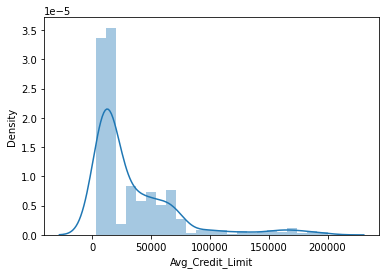

C:\Users\Lacey\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


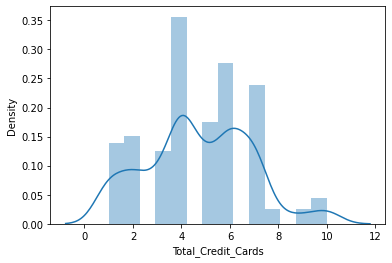

C:\Users\Lacey\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


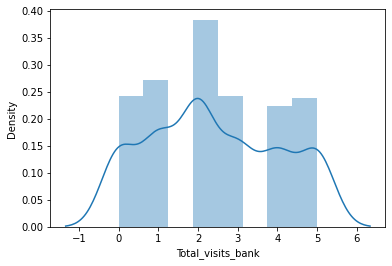

C:\Users\Lacey\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


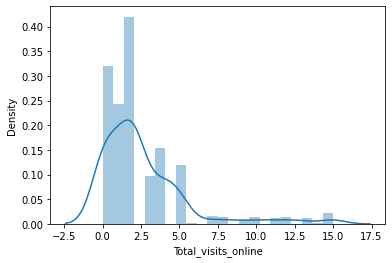

C:\Users\Lacey\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


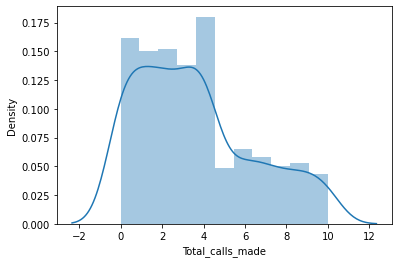

In [10]:
for i in ['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']:
    sns.distplot(df[i])
    plt.show()

Graph insight:
Total visits online, average credit limit, and total calls made both have long right-hand tails.  Total credit cards and total visits bank seems to be relatively normally distributed.

In [11]:
df.drop('Customer Key', axis=1, inplace=True)
df_scaled = df.apply(zscore)
df_scaled.head(10)

,Sl_No,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-1.729428,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,-1.724180,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,-1.718931,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-1.713683,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,-1.708434,1.740187,0.597334,-1.473731,3.202298,-0.203739
5,-1.703185,-0.387644,-0.787585,-1.473731,-0.547490,1.542593
6,-1.697937,1.740187,0.135694,-1.473731,2.861408,-0.553005
7,-1.692688,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271
8,-1.687439,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005
9,-1.682191,-0.839808,-0.325946,-1.473731,-0.547490,1.193326


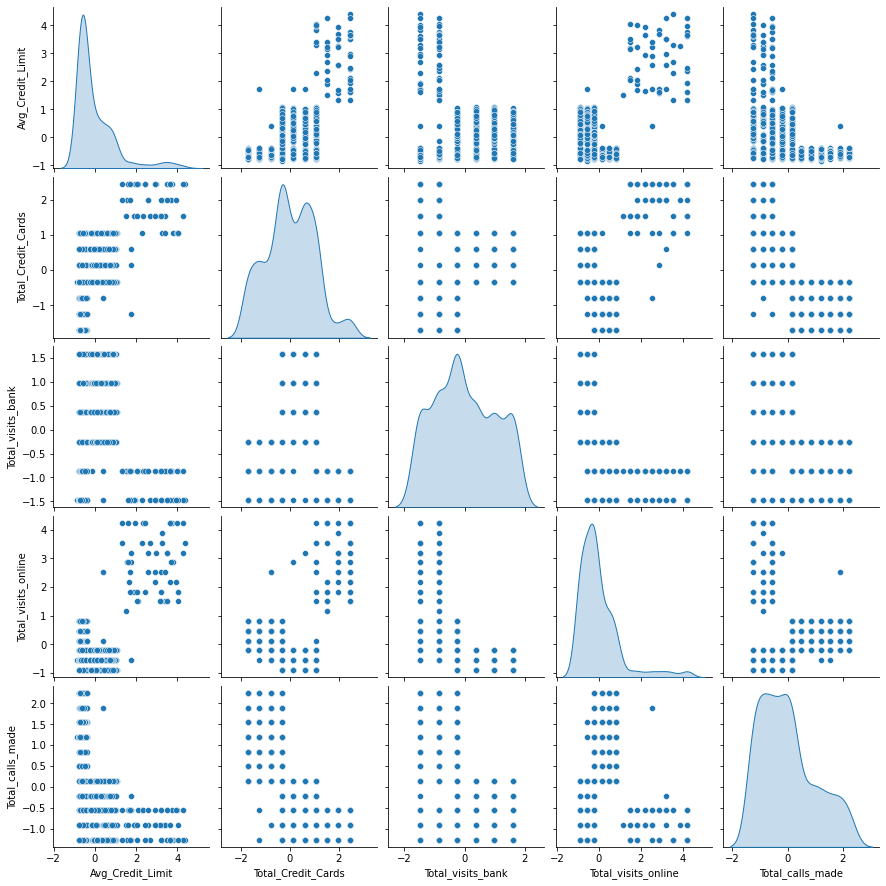

In [12]:
sns.pairplot(df_scaled[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 
                        'Total_visits_online', 'Total_calls_made']], diag_kind='kde');

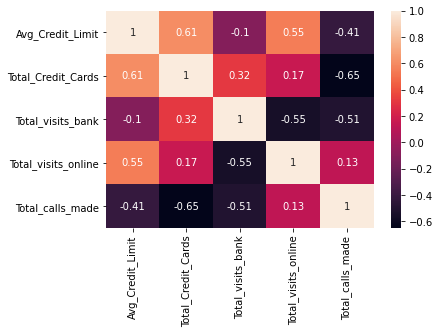

In [13]:
sns.heatmap(df_scaled[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 
                  'Total_visits_online', 'Total_calls_made']].corr(), annot=True);

K-means clustering

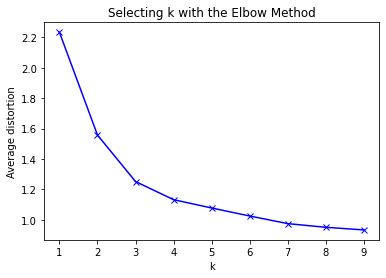

In [14]:
# using elbow method to find number of clusters
meanDistortions = []
clusters = range(1,10)

for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(df_scaled)
    prediction = model.predict(df_scaled)
    meanDistortions.append(sum(np.min(cdist(df_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method');

In [15]:
#fitting model and seeing how many records fall into each cluster
model = KMeans(3)
model.fit(df_scaled)
pred = model.predict(df_scaled)

df['kgroup'] = pred  
df_scaled['kgroup'] = pred
dfclust3 = df.groupby(['kgroup'])
dfclust3.mean()

,Sl_No,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
kgroup,,,,,,
0,611.280000,141040.000000,8.740000,0.600000,10.900000,1.080000
1,420.500000,33507.812500,5.518229,3.505208,0.979167,2.000000
2,115.460177,12831.858407,2.433628,0.929204,3.535398,6.827434


In [16]:
df.groupby('kgroup').count()

,Sl_No,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
kgroup,,,,,,
0,50,50,50,50,50,50
1,384,384,384,384,384,384
2,226,226,226,226,226,226


array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[kgroup]'>,
        <AxesSubplot:title={'center':'Sl_No'}, xlabel='[kgroup]'>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[kgroup]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[kgroup]'>],
       [<AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[kgroup]'>,
        <AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[kgroup]'>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

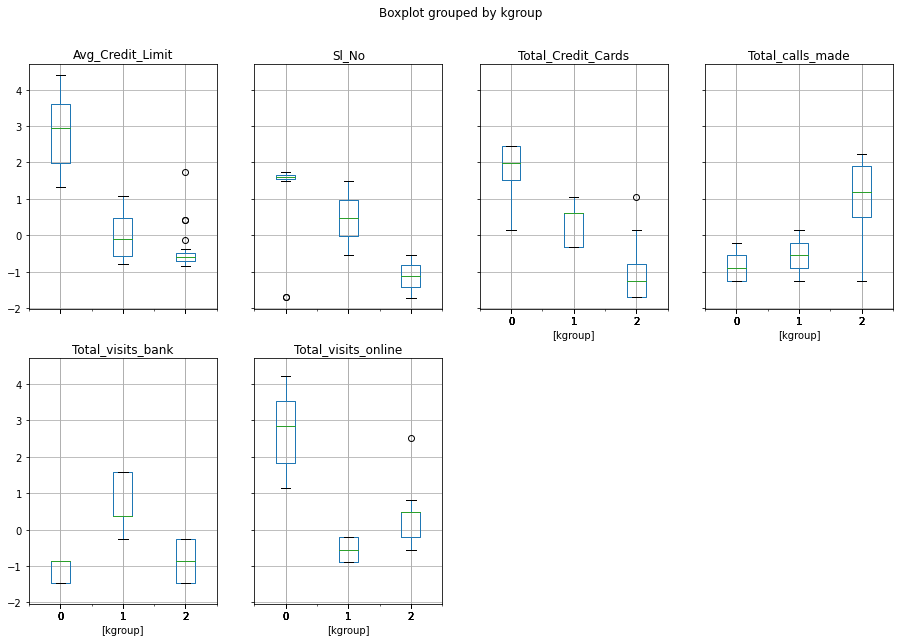

In [17]:
#visually representing the 3 clusters in each attribute using boxplots:
df_scaled.boxplot(by='kgroup', layout=(2,4), figsize=(15,10))

In [18]:
labels = model.labels_
sil_score = silhouette_score(df_scaled, labels, metric='euclidean')
print('The silhouette score for K-mean clustering is:', sil_score)

The silhouette score for K-mean clustering is: 0.5485653724121834


Hierarchical Clustering

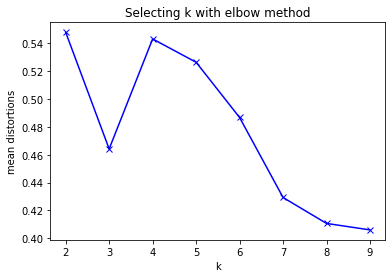

In [19]:
# calculating number of clusters using elbow method:
meanDistortions=[]
clusters = range(2,10)

for k in clusters:
    model = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean',  linkage = 'average')
    model.fit(df_scaled)
    pred = model.labels_
    meanDistortions.append(silhouette_score(df_scaled, pred))


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('mean distortions')
plt.title('Selecting k with elbow method');

dendrograms of each linkage type along with conphenet index:


Linkage type cophenet index -> average: 0.9143878173714951



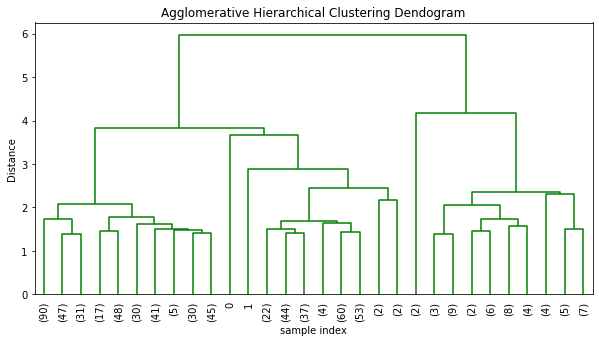

In [20]:
print()
Z = linkage(df_scaled, metric='euclidean', method = 'average')
c, coph_dists = cophenet(Z , pdist(df_scaled))
print('Linkage type cophenet index -> average:', c)
print()

Z = linkage(df_scaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df_scaled))
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='lastp', leaf_rotation=90.,color_threshold = 90, leaf_font_size=10.)
plt.show()




Linkage type cophenet index -> ward: 0.768735979958826



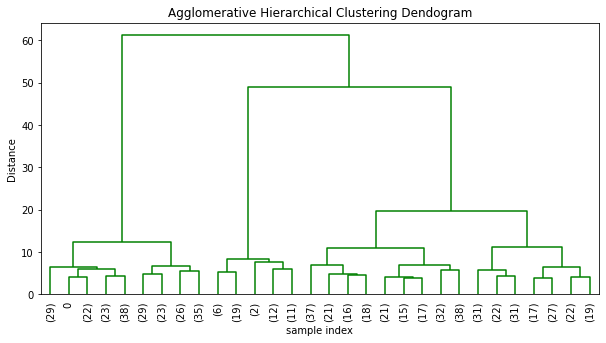

In [21]:
print()
Z = linkage(df_scaled, metric='euclidean', method = 'ward')
c, coph_dists = cophenet(Z , pdist(df_scaled))
print('Linkage type cophenet index -> ward:', c)
print()

Z = linkage(df_scaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(df_scaled))
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='lastp', leaf_rotation=90.,color_threshold = 90, leaf_font_size=10.)
plt.show()


Linkage type cophenet index -> complete: 0.8996149940435021



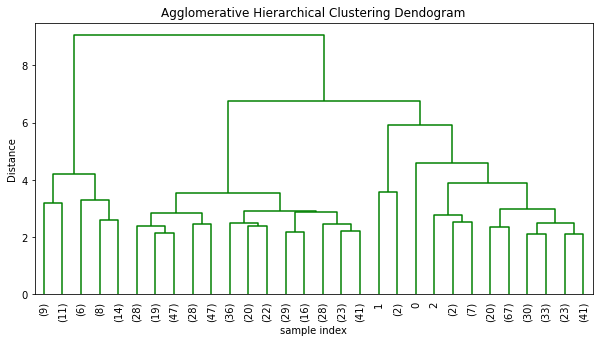

In [22]:
print()
Z = linkage(df_scaled, metric='euclidean', method = 'complete')
c, coph_dists = cophenet(Z , pdist(df_scaled))
print('Linkage type cophenet index -> complete:', c)
print()

Z = linkage(df_scaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(df_scaled))
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='lastp', leaf_rotation=90.,color_threshold = 90, leaf_font_size=10.)
plt.show()


Linkage type cophenet index -> single: 0.8783553399012068



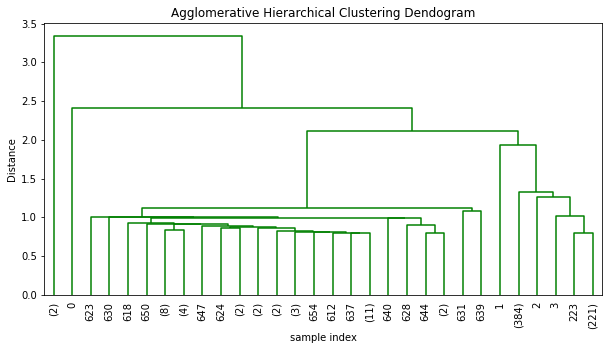

In [23]:
print()
Z = linkage(df_scaled, metric='euclidean', method = 'single')
c, coph_dists = cophenet(Z , pdist(df_scaled))
print('Linkage type cophenet index -> single:', c)
print()

Z = linkage(df_scaled, metric='euclidean', method='single')
c, coph_dists = cophenet(Z , pdist(df_scaled))
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='lastp', leaf_rotation=90.,color_threshold = 90, leaf_font_size=10.)
plt.show()


Linkage type cophenet index -> weighted: 0.9124335156445855



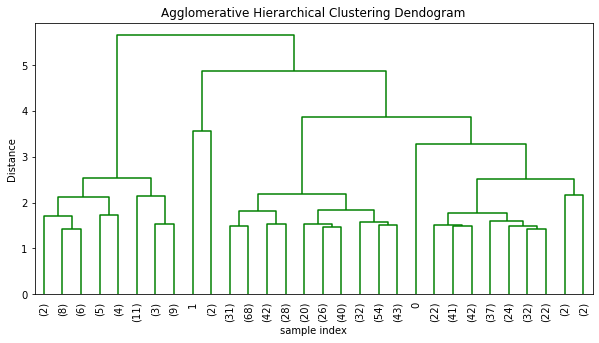

In [24]:
print()
Z = linkage(df_scaled, metric='euclidean', method = 'weighted')
c, coph_dists = cophenet(Z , pdist(df_scaled))
print('Linkage type cophenet index -> weighted:', c)
print()

Z = linkage(df_scaled, metric='euclidean', method='weighted')
c, coph_dists = cophenet(Z , pdist(df_scaled))
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='lastp', leaf_rotation=90.,color_threshold = 90, leaf_font_size=10.)
plt.show()


Linkage type cophenet index -> centroid: 0.9112778607726365



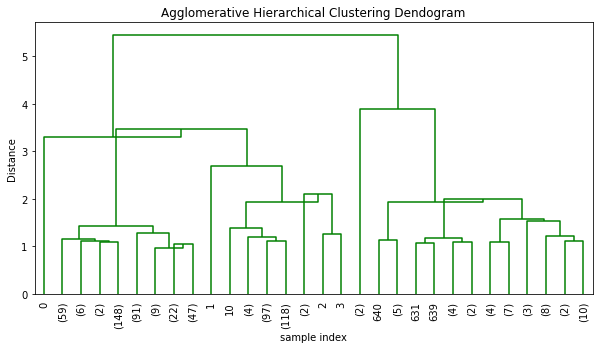

In [25]:
print()
Z = linkage(df_scaled, metric='euclidean', method = 'centroid')
c, coph_dists = cophenet(Z , pdist(df_scaled))
print('Linkage type cophenet index -> centroid:', c)
print()

Z = linkage(df_scaled, metric='euclidean', method='centroid')
c, coph_dists = cophenet(Z , pdist(df_scaled))
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='lastp', leaf_rotation=90.,color_threshold = 90, leaf_font_size=10.)
plt.show()


Linkage type cophenet index -> median 0.9078765449651898



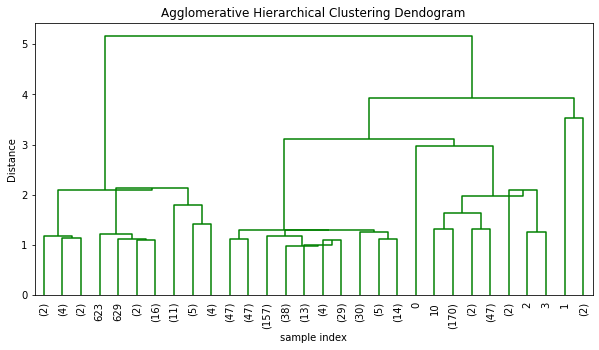

In [26]:
print()
Z = linkage(df_scaled, metric='euclidean', method = 'median')
c, coph_dists = cophenet(Z , pdist(df_scaled))


print('Linkage type cophenet index -> median', c)

print()

Z = linkage(df_scaled, metric='euclidean', method='median')
c, coph_dists = cophenet(Z , pdist(df_scaled))
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='lastp', leaf_rotation=90.,color_threshold = 90, leaf_font_size=10.)
plt.show()

In [19]:
hier_modelss = AgglomerativeClustering(n_clusters = 3, affinity='euclidean',  linkage='average')
hier_modelss.fit(df_scaled)
labels = hier_modelss.labels_
sil_score2 = silhouette_score(df_scaled, labels, metric='euclidean')
print('The silhouette score for hierarchical grouping is:', sil_score2)

The silhouette score for hierarchical grouping is: 0.4848955885867489


In [20]:
hier_model = AgglomerativeClustering(n_clusters = 2, affinity='euclidean',  linkage='average')
hier_model.fit(df_scaled)
pred = hier_model.labels_
df['hier_groups2'] = pred
df_scaled['hier_groups2'] = pred
dfclust4 = df.groupby(['hier_groups2'])
dfclust4.mean()

,Sl_No,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,hier_groups3
hier_groups2,,,,,,,
0,611.280000,141040.000000,8.74000,0.60000,10.90000,1.080000,1.04
1,307.485246,25847.540984,4.37541,2.55082,1.92623,3.788525,0.00


In [21]:
hier_model = AgglomerativeClustering(n_clusters = 3, affinity='euclidean',  linkage='average')
hier_model.fit(df_scaled)
pred = hier_model.labels_
df['hier_groups3'] = pred
df_scaled['hier_groups3'] = pred
dfclust4 = df.groupby(['hier_groups3'])
dfclust4.mean()

,Sl_No,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,hier_groups2
hier_groups3,,,,,,,
0,307.485246,25847.540984,4.37541,2.55082,1.92623,3.788525,1.0
1,636.500000,142750.000000,8.87500,0.62500,10.87500,1.020833,0.0
2,6.000000,100000.000000,5.50000,0.00000,11.50000,2.500000,0.0


In [22]:
df.groupby('hier_groups2').count()

,Sl_No,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,hier_groups3
hier_groups2,,,,,,,
0,50,50,50,50,50,50,50
1,610,610,610,610,610,610,610


In [23]:
df.groupby('hier_groups3').count()

,Sl_No,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,hier_groups2
hier_groups3,,,,,,,
0,610,610,610,610,610,610,610
1,48,48,48,48,48,48,48
2,2,2,2,2,2,2,2


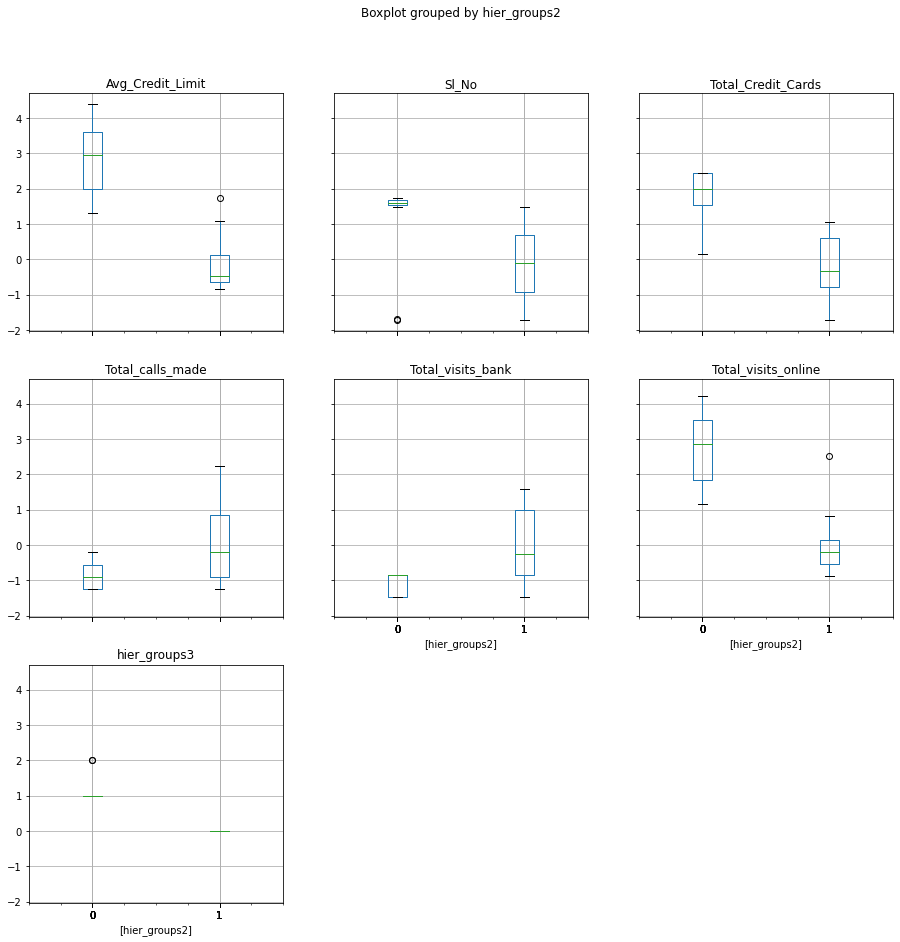

In [24]:
df_scaled.boxplot(by='hier_groups2', figsize=(15,15));

--> Compare K-means clustering with hierarchical clustering.


K-means produced three groups whereas hierarchical produced two.  When I attempted the run a hierarchical clustering model with 3 clusters, only 2 records were included in the third cluster.  Even though the hierarchicical method produced less clusters, the characteristics of the cluster were still similar to the clusters found with K-means clustering.  The boxplots formed from both these models show relatively well-formed groups, with the hierarchical clustering method having slightly more distinction in its groups.  Oddly, the hierarchical clustering method split up the data into group 0 with 50, and group 1 with 610, so only 8% of the records fall into group 0. K-means clustering had a slightly better spread of records: 226 records fell into group 0, 384 records fell into group 1, and 50 records fell into group 2.  Additinally, the silhouette score of the K-means method was 0.56, whereas it was 0.46 for the hierarchical method.  These means there is more cohesion amongst the clustered points in the K-means model, making it a stronger classifier.


Key Questions:
1. How many different segments of customers are there? / 2. How are these segments different from eachother?

There appear to be three segments according to K-means clustering: 

--> SEGMENT 1 <-- 

lowest credit limit, 

lowest number of credit cards, 

middle number of visits to the bank, 

middle number of visits online, 

highest number of calls to the bank.


--> SEGMENT 2 <-- 

middle credit limit, 

middle number of credit cards, 

highest number of bank visits, 

lowest number of online visits, 

middle number of calls to the bank.


--> SEGMENT 3 <-- 

highest credit limit, 

highest number of credit cards, 

highest number of visits online, 

lowest number of visits to the bank, 

lowest number of calls to the bank.


-----------------------------------

Hierarchical clustering tends to agree with this, although it only creates two groups.  These two groups follow similar trends though:

--> GROUP 1 <--

High credit limit,

Lower number of visits to the bank,

High visits online,

Low number of calls made to the bank

--> GROUP 2 <--

Lower credit limit,

higher number of visits to the bank,

lower visits online,

higher number of calls made to the bank

3. What are your recommendations to the bank on how to better market to and service these customers?

There appears to be a relationship between credit limit and manner in which the customer interacts with the bank.  This information can be used to tailor contact preferences to a customers needs.  In this case, it appears that customers with higher credit limits like doing their banking online, whereas customers with lower credit limits tend to do their banking via phone calls or in person.  Additionally, people with higher credit limits also have more credit cards.